<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# LECTURE 1

Let's go through the details of the class here  
[class overview (to be udpated)](https://www.dropbox.com/s/mfg65mk784l2uja/PCH_Lecture1_8S50.pdf?dl=0) 

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 1.0 Overview of Learning Objectives

In this lecture we will explore the following objectives:

- Plotting distributions
- Sampling from distributions
- Probability distribution functions
- Expectation of a distribution
- Variance of a distribution

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 1.1 Making a Plot

Before we do anything substantial, lets make a plot. For this class, we will use numpy, matplotlib and scipy stats. Please go here to make sure you can install these packages and jupyter on your computer. 

You can see [here](https://cs231n.github.io/python-numpy-tutorial/#python) for more info on python. Also, you can see [here]() for a quick installation [here](https://jupyter.org/install) for a jupyter install. The other packages can be installed with pip.  Here is a quick setup to install and load the libraries. 

<br>
<!--end-block-->

<!--start-block-->
### Code

In [1]:
import sys
#we will install the core packages here
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

#additionally we will now load them
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issue

To plot something, what we will do is use the numpy functions. The numpy functions are functions that can be run on arrays of objects and output arryas themselves. We will use this all the time. To put some clarity in this. Lets make an array and evaulate it. 

In [4]:
x = np.linspace(start=-4, stop=4, num=5)
y = np.sin(x)
print(x,y)

[-4. -2.  0.  2.  4.] [ 0.7568025  -0.90929743  0.          0.90929743 -0.7568025 ]


Ok, now lets make a plot, we will plot a few distributions, a sin, cosine, and we will plot a normal distribution using the scipy states function. 

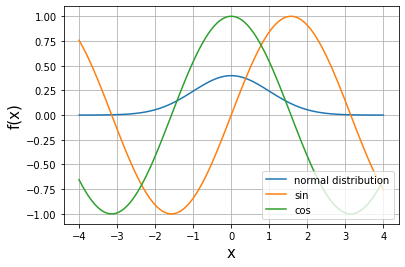

In [5]:
#Lets plot a few random functions
#First we define an x-axis
x = np.linspace(start=-4, stop=4, num=100)
mu = 0
std = 1
y = stats.norm.pdf(x, mu, std) 
plt.plot(x, y,label='normal distribution')
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, np.cos(x), label='cos')
plt.legend(loc='lower right')
plt.grid() # a grid
plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('f(x)', fontsize=15)#Label y
plt.show()

While, its not the focus of this class. It is important to follow good plotting etiquette when you have a final plot. Namely, you should have :
- Label all axes
- Label all lines with a legend (if more than one)
- Make sure plot and is readable (axis ranges are right size)

The next concept that we need to understand is a histogram. A histogram is just a sum of data points that fall within a specific range of x. We can compute it using the ```np.histogram``` function. This outputs an array with the number of events per bin along with the edges of the bin. 

To fill this histogram we will generate set of random events. We will use the ```np.random.uniform``` funciton, which generates random numbers from a uniform distribution. Then we will fill a 20-bin histogram with this info.  


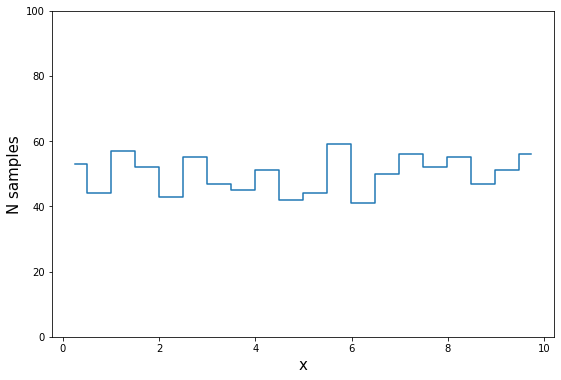

In [9]:
#Randomly choose 1000 events between 0 and 10
bkg = np.random.uniform(0,10, 1000) 
#Now lets make a histogram
histy, bin_edges = np.histogram(bkg, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
#now lets mack a plot
fig, ax = plt.subplots(figsize=(9,6))
ax.set_ylim([0,100]) #set the y-range to be 0 to 100
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('N samples', fontsize=15) #Label y
plt.show()

<!--start-block-->
### >>>QUESTION-1.1a

Question: How would you take an integral of a histogram? How would you take an integral of a distribution?

<question multiplechoice>
csq_name = 'EX_01_01a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True
    
csq_renderer = 'radio'
csq_prompt='Question Text:'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>   

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 1.2 Sampling events

Now what we would like to do is something a bit more complicated. In the following notes, we are going to sample a to flat distributions randomly and then define an observable to make this distribution.  Furthermore, we are going to integrate this distribution, so we know what the total number of events. In this case, the integral is very simple. 

<br>
<!--end-block-->

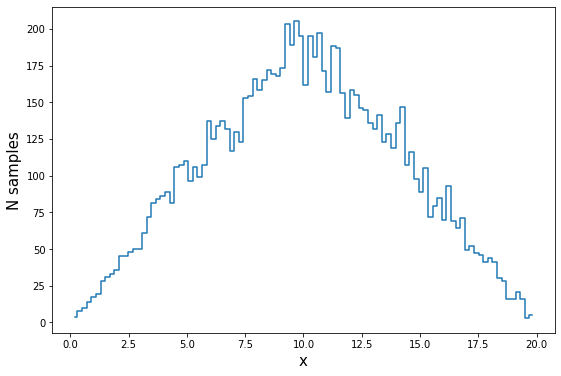

In [10]:
#Lets sample a uniform distribution 10k times each
bkg1 = np.random.uniform(0,10, 10000)
bkg2 = np.random.uniform(0,10, 10000)
#Now we sum them
data = bkg1+bkg2
#The integral is just the length (10k)
integral = len(data)
fig, ax = plt.subplots(figsize=(9,6))
histy, bin_edges = np.histogram(data, bins=100)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('N samples', fontsize=15) #Label y
plt.show()

Now, what is the distribution that we are sampling? 

Let's derive it analytically. However, before we do that, let's actually define a few statistical observables. 

To understand this, we need to define a probabilitiy distribution function or pdf. When we sample a uniform distribution from 0 to 10 we are taking a random number in that range. We can translate the process of taking a random sample into a distributim $p(x)$ where we define the probability $P(X)$ as 

$$P(X)=\int_{a}^{b}p(x)dx$$

or in other words the probability that a number is sampled between $a$ and $b$ is given by the integral of $p(x)$ over that range. As a consquence we have that integrating over all possibilities we have a probability of 1. 

$$1=\int_{-\infty}^{\infty}p(x)dx$$

For a flat distribution, the probability to be within $a$ and $b$ is just going to be $b-a$ divided by the total range.  To check this. Lets just count events in our range. 

In [12]:
#We can make this an exercise
#define and a=xmin and b=xmax
xmin=2
xmax=5
#sample
bkg1 = np.random.uniform(0,10, 10000)
#now count
prob=0
total=0
for x in bkg1:
    total+=1
    if x > xmin and x < xmax :
        prob+=1
print("Probability that we are between a and b is: ",prob/total, "true probability is:",(xmax-xmin)/10)

Probability that we are between a and b is:  0.2969 true probability is: 0.3


So we see that we get a number very close to true. It is not exact, because now we are dealing with sampled events. We will get back to the lack of exactness going further.  Now in addition to having a pdf, we can define something called the cumlative distribtuion funciton (CDF). This function is similar to the probability, except we integrate one end of the pdf to infinity. 

$$\rm{CDF}(x)=\int_{x}^{\infty}p(u)du$$

This is now a function of $x$, but it actually involves an integral over the PDF. Let's make a few quick CDF distributions. 

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
x = np.linspace(-5,5,100)
ax.plot(x, norm.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('N samples', fontsize=15) #Label y
plt.show()

<!--start-block-->
<hr style="height: 1px;">

## 1.3 Expectaction and Variance

Now, going furthre, this should be very familiar if you have taken quantum mechanics. Some important consquences of this is that we can define the expectation $E[x]$

$$E[x]=\int_{-\infty}^{\infty}xp(x)dx$$

or in other words the probability weighted value of $x$. This is the most likely value of $x$. 

Furthermore, We can also define the variance of this distribution, which we define as: 

$$V[x]=\int_{-\infty}^{\infty}\left(x-E[x]\right)^{2}p(x)dx$$

or in other words the spread of the numbers about the mean of the distribution. The variance is defined by the above formula, but it holds an important interpretation as we will see later. Lets compute the mean and variance of a flat distribution. 

To see how to compute this for a flat distribution, we note that for a flat distribution, we can write $p(x)=\frac{1}{N_{samples}}$. To see this we note that there is an equal probablity of any number, and the if we sample this distribution $N_{samples}$ times, then the probability of one sample is $\frac{1}{N_{samples}}$.

In [17]:
#Again another exercise
#sample
nsamples=10000
bkg1 = np.random.uniform(0,10, nsamples)
#mean
mean=0
prob=1./nsamples
for x in bkg1:
    mean+=x*prob
print("Mean: ",mean)
#Now we can do the variance
var=0
for x in bkg1:
    var+=(x-mean)*(x-mean)*prob
print("Var: ",var)
#Now we can do it the fast way
print("Mean:",bkg1.mean(),"Variance:",bkg1.var())

Mean:  4.969790072519376
Var:  8.34881731779348
Mean: 4.969790072519366 Variance: 8.348817317793452


Ok Now back to the above distribution, lets first turn a uniform distribution from 0 to 10 into a pdf. For this we know that the function is flat between 0 and 10, and zero otherwise. Consequently $f(x)=a$ when $x\in[0,10]$, and 
\begin{equation}
1=\int_{0}^{10}adx=ax|_{0}^{10}=10a\\
a=\frac{1}{10}
\end{equation}
As a quick check we find the expectation of this distribution is 
\begin{equation}
E[x]=\int_{0}^{10}axdx=\frac{ax^2}{s}|_{0}^{10}=50a\\
E[x]=5
\end{equation}

Now lets consider sampling this distribution twice. If we get a result $x^\prime=x_{1}+x_{2}$ we have a broad range of possible solutions. Lets say $x^{\prime}=10$ then it could be that one sample $x_{1}=5$ and the other sample $x_{2}=5$ or it could be that $x_{1}=10$ and $x_{2}=0$. To get all the possbible values for $x^{\prime}=10$ we need to compute the expectation over all possibilities. This is equivalent imposing a constraint that $x^{\prime}=x_{1}+x_{2}\rightarrow x_{2}=x^{\prime}-x_{1}$. 

The best way to think about this is as a 2D distribution. Lets make a plot of this. 


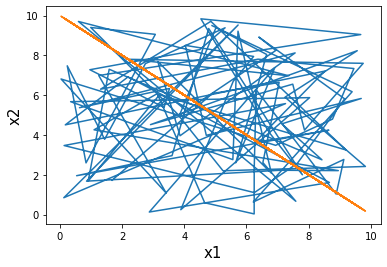

In [29]:
bkg1 = np.random.uniform(0,10, 100)
bkg2 = np.random.uniform(0,10, 100)
#Now we sum them
data = bkg1+bkg2
#now lets fix x-prime to be 10
val=10-bkg1
#now lets plot them
plt.plot(bkg1,bkg2,'')
plt.plot(bkg1,val,'')
plt.xlabel('x1', fontsize=15) #Label x
plt.ylabel('x2', fontsize=15) #Label y
plt.show()

So when we fix $x^{prime}$ and sample events that is equivalent to just drawing a line on the the 2D plot. Now if we think of this distribution as a 2D probability distribution function, we can write. 
\begin{eqnarray}
P(x_{1},x_{2})&=&\int_{x^1_{min}}^{x^1_{max}} \int_{x^2_{min}}^{x^2_{max}}p(x_{1})p(x_{2})dx_{1}dx_{2}
\end{eqnarray}
With the probability $P$ defined now as 2D integral. In this case we treated it as to independent probability distriboutions $p(x_{1})$ and $p(x_{2})$. In reality this function can be a funciton of both variables $p(x_{1},x_{2})$. We can now simplify this distribution into a 1D distribution by integrating over the line where $x^{\prime}=x_1+x_2$


\begin{eqnarray}
p(x^\prime=x_{1}+x_{2})&=&\int_{-\infty}^{\infty}p(x_{1})p(x^\prime-x_{1})dx_{1}
\end{eqnarray}

For this we have then 
\begin{eqnarray}
p(x^\prime=x_{1}+x_{2})&=&\int_{-\infty}^{\infty}p(x_{1})p(x^\prime-x_{1})dx_{1}
&=&\int_{0}^{10}\frac{1}{a}p(x^\prime-x_{1})dx_{1}\\
\end{eqnarray}
Now we have to deal with several cases. The case where $x^{\prime} > 10$ and so the smaller number cannot go down to zero, but only to a minum of $x^{\prime}-10$ (the max number would be 10 at that minimum. Also, we have the case where $x\prime \leq 10$ and we can do the full integral. Doing this out gives us

\begin{eqnarray}
&=&\int_{x^\prime-10}^{10}\frac{1}{a^2}dx_{1}~\forall x^\prime \geq 10\\
&=&\frac{20-x^\prime}{a^2}~\forall x^\prime \geq 10\\
&=&\frac{x^\prime}{a^2}~\forall x^\prime < 10\\
\end{eqnarray}



Or in otherwords we have a line sloping up when we are below 10, and sloping down when we are above 10. To check that this is a full pdf we can then check the normalization
\begin{equation}
\int_{-\infty}^{\infty}p(x^\prime)dx^{\prime}=\frac{x^2}{2a^2}|^{10}_{0}+\frac{20x-x^2/2}{a^2}|^{20}_{10}\\
1=\frac{100}{200}+\frac{400-200}{100}-\frac{200-50}{100}\\
1=\frac{1}{2}+\frac{200-150}{100}=1\\
\end{equation}

The nice thing about computers is we don't need to do all these integrals to get these lines. Finally, we lets actually plot all of these on the same plot! We now have a histogram and a function. 

There is one tricky component in the below formula is that we want to compare a distribution with a histogram, so we need to ensure that the integrals are the same. What this means is that for each bin the values need to be the same or in other words
\begin{equation}
N_{samples} = \int_{x_{min}}^{x_{max}} p(x) dx\approx\frac{p(x)}{x_{max}-x_{min}}= 1/\Delta x
\end{equation}
Now for a distribution we can write $\Delta x=\frac{x_{max}-x_{min}}{N_{bins}}$ and so for our function to work we need to write 
\begin{equation}
f(x)=\frac{1}{\Delta x} p(x^{\prime}) 
\end{equation}

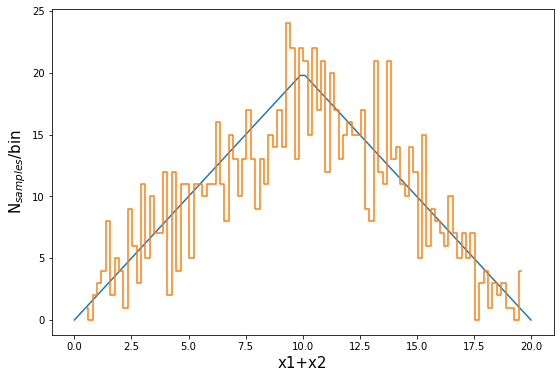

In [47]:
#Lets first add our numbers
nsamples=1000
bkg1 = np.random.uniform(0,10, nsamples)
bkg2 = np.random.uniform(0,10, nsamples)
data = bkg1+bkg2
fig, ax = plt.subplots(figsize=(9,6))
nbins=100
histy, bin_edges = np.histogram(data, bins=nbins)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
#Now lets define our function. 
def function(ix,norm=nsamples/(nbins/20)):#note the norm is for n bins over 0-20
    if ix < 10:
        return norm*(ix/100)
    else: 
        return norm*(20-ix)/100
#We need to evaulate the function, so we do it like this
x = np.linspace(start=0, stop=20, num=100)
#this list(map) is just a trick to run this function on all elements in the array
y = np.array(list(map(function, x)))
plt.plot(x, y,label='analytic pdf')
#ax.set_ylim([0,150])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.xlabel('x1+x2', fontsize=15) #Label x
plt.ylabel('N$_{samples}$/bin', fontsize=15) #Label y
plt.show()

Now lets sample something Crazier: 

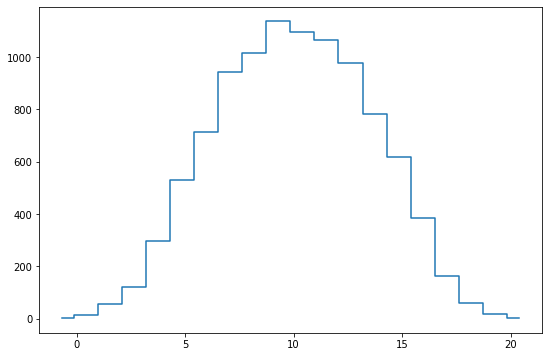

In [42]:
#Sample something crazy
bkg1 = np.random.uniform(0,10, 10000)
bkg2 = np.random.normal (5,2 , 10000)
data = bkg1+bkg2
fig, ax = plt.subplots(figsize=(9,6))
histy, bin_edges = np.histogram(data, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
#ax.set_ylim([0,150])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.show()

The point of this is that we can put sample events from any distribution we want!

<!--start-block-->

Lets consider a set of measurements. Like we had with the two variables, if we take $N$ measurements, we can treat them as $N$ separate varabiles. Often the measurements can be sampled from the same distribution (like we had for the above case). So typically we treat these measurements as independent variables, each from some underlying distribution. We can think of these measurements as independent, as a consquence. This means the measurement performed once doesn't affect the measurement after. The probility distributions of these will be like the 2D probability distribtuion we had before, but now with $N$ variables. Thus, we can define the joint pdf distribution of these as 
\begin{equation}
p(x_{1},x_{2})=p(x_{1})p(x_{2})dx_{1}dx_{2} \\
p(x_{1},...,x_{n})=\Pi_{i=0}^{i=N}p(x_{i})
\end{equation}
Lets visualize some measurements sampled from the same distribution, we will take two measurements, $x_{1}$ and $x_{2}$ and because we can we will run this experiment 1000 times. We will use a normal distribution, which is defined as 
\begin{equation}
N(x,\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{-(x-\mu)^2}{\sigma^2}}
\end{equation}
This is a standard distribution that we will use consumately in this class. 

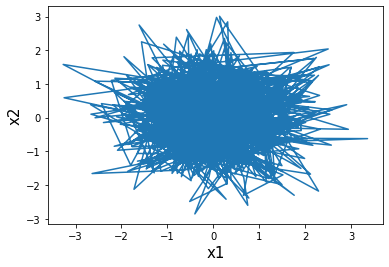

In [50]:
#Lets first add our numbers
nsamples=1000
mu=0
sigma=1
x1 = np.random.normal(mu,sigma, nsamples)
x2 = np.random.normal(mu,sigma, nsamples)
plt.plot(x1,x2,'')
plt.xlabel('x1', fontsize=15) #Label x
plt.ylabel('x2', fontsize=15) #Label y
plt.show()

From this setup, we can define a bunch of variables, we call observables. Let's list the definition of these variables, and then we will go ahead and see what we can do with them. First, we define the mean $\bar{x}$. 

\begin{equation}
\bar{x}=\frac{1}{N}\sum_{i=1}^{N} x_{i}
\end{equation}

To be clear, this is an observable, (ie a calculation), that we perform to the data that we have at hand. This is also the same thing as taking an expectation of objects form a flat prior. 

We can then compute the expectation of $\bar{x}$ for our sampled distribution. This expectation gives us: 
\begin{equation}
E[\bar{x}]=\int \left(\frac{1}{N}\sum_{i=1}^{N} x_{i}\right)\Pi_{i=0}^{i=N}p(x_{i}) dx_{i}\\
E[\bar{x}]=\frac{1}{N}\times N\int x_{j}\Pi_{i=0}^{i=N}p(x_{i}) dx_{i}\\
E[\bar{x}]=E[x]\\
\end{equation}
Or on averge $\bar{x}$ will just be the mean of the distribution. 


Now, we can define the variance of the data in a similar way
\begin{equation}
V(\bar{x})=\frac{1}{N}\sum_{i=1}^{N} (x_{i}-\bar{x})^{2}
\end{equation}

Note that the form above is very similar to the Variance of a distribution, defined by
\begin{equation}
E\left[V(x)\right]=\frac{1}{N}\int_{-\infty}^{\infty}\left(x_{i}-\bar{x}\right)^{2}\Pi_{i=0}^{i=N}p(x_{i}) dx_{i}\\
E\left[V(x)\right]=\frac{N}{N}E[(x-\bar{x})^2]\\
E\left[V(x)\right]=V(x)\\
\end{equation}

And now we can consider the variance of these distributions.Lets do the variance of our defined $\bar{x}$. First lets derive it for just one variable. 
\begin{eqnarray}
V\left[\bar{x}\right]&=&\int (x_i-\bar{x})^2 p(x_i)dx_i\\
                     &=&\int (x^2_i-2x_{i}\bar{x}+\bar{x}^2) p(x_i)dx_i\\
                     &=&\int x^2_i p(x_i)dx_i - 2\bar{x}^2+\bar{x}^2\\
                     &=&\int x^2_i p(x_i)dx_i -  \bar{x}^2\\
                     &=&\int (x^2_i-\bar{x}^2) p(x_i)dx_i  
\end{eqnarray}

I would like to warn you that this is a complicated calculation.

\begin{eqnarray}
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\sum_{i=1}^{N} x_{i}-\bar{x}\right)^{2} \Pi_{i=0}^{i=N}p(x_{i}) dx_{i} \\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left( \left(\sum_{i=1}^{N} x_{i}\right)^2-2N\left(\sum_{i=1}^{N} x_{i}\right)\bar{x}+ N^2\bar{x}^2\right)\Pi_{i=0}^{i=N}p(x_{i}) dx_{i}\\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left( \left(\sum_{i=1}^{N} x_{i}\right)^2\right) \Pi_{i=0}^{i=N}p(x_{i}) dx_{i}-\frac{2}{N}\bar{x}N\bar{x}+\bar{x}^2 \\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left( \left(\sum_{i=1}^{N} x_{i}\right)\left(\sum_{i=1}^{N} x_{i}\right) \right) \Pi_{i=0}^{i=N}p(x_{i}) dx_{i}-\bar{x}^2\\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left(\sum_{i} x_{i}^2 + 2\sum_{i}\sum_{j\neq i}x_{i}x_{j} \right) \Pi_{i=0}^{i=N}p(x_{i}) c-\bar{x}^2\\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left(\sum_{i} x_{i}^2\right)\Pi_{i=0}^{i=N}p(x_{i})dx_{i} + \frac{(N-1)}{N}\bar{x}^2-\bar{x}^2\\
V\left[\bar{x}\right]&=&\int \left(\frac{1}{N}\right)^2 \left(\sum_{i} x_{i}^2 -N\bar{x}^2\right)\Pi_{i=0}^{i=N}p(x_{i})dx_{i} + \frac{1}{N}\bar{x}^2 + \frac{(N-1)}{N}\bar{x}^2-\bar{x}^2\\
V\left[\bar{x}\right]&=&\left(\frac{1}{N}\right) \int \left(\frac{1}{N}\right) \left(\sum_{i} x_{i}^2 -N\bar{x}^2\right)\Pi_{i=0}^{i=N}p(x_{i})dx_{i} \\
V\left[\bar{x}\right]&=&\left(\frac{1}{N}\right) \left(\frac{1}{N}\right)N V(x) \\
V\left[\bar{x}\right]&=&\left(\frac{1}{N}\right) V(x) \\
\end{eqnarray}
Where $V(x)$ is the variance of any distribution. This is very important. What this means is that if we sample many times a distribution each with a variance $\sigma$, we have that the variance of the average over this distribution scales as $\frac{1}{N}$ the variance. This means that if you are measuing the mean, the uncertainty on the mean scales as the $\sqrt{V[\bar{x}]}=\sqrt{\frac{1}{N}V[x]}$. 
To understand how this works, lets make some toys. 

<br>
<!--end-block-->

/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


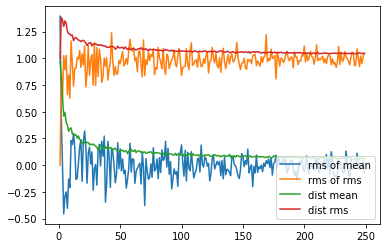

In [51]:
import math
#define a function that samples a normal distribution N times and then returns mean and variance
def sample(iN):
    sample  = np.random.normal (0,1,iN)
    return sample.mean(),sample.std()

#This function runs 100 tests where we sample N times, we call these toys
def meansample(iN):
    ntoys=100
    allmeans=np.array([])
    allrmses=np.array([])
    for i0 in range(ntoys):
        pMean,pRMS=sample(iN)
        allmeans=np.append(allmeans,pMean)
        allrmses=np.append(allrmses,pRMS)
    return allmeans.std(),allrmses.std()
nvar=[]
mean=[]
rms=[]

distmean=[]
distrms=[]

funcrms=[]
funcmean=[]
#Now we iterate from 1 to 250 and compute mean and RMS
for i0 in range(250):
    nvar.append(i0)
    funcmean.append(1./math.sqrt(1+i0))
    funcrms .append(1+1./math.sqrt(1+i0))
    #Sample just once 
    pMean,pRMS=sample(i0)
    distmean.append(pMean)
    distrms.append(pRMS)
    #sample many times
    pMean,pRMS=meansample(i0)
    mean.append(pMean)
    rms.append(1+pRMS)

#plt.plot(nvar,funcmean,'--',label='func rms of mean')
#plt.plot(nvar,funcrms,'--',label='func rms of rms')
plt.plot(nvar,distmean,label='rms of mean')
plt.plot(nvar,distrms,label='rms of rms')
plt.plot(nvar,mean,label='dist mean')
plt.plot(nvar,rms,label='dist rms')
plt.legend(loc='lower right')
plt.show()

Challenge: we know that the varaiance and mean for a normal distribution are 
\begin{eqnarray}
E(N(x,\mu,\sigma)) & = & \mu \\
V(N(x,\mu,\sigma)) & = & \sigma \\
\end{eqnarray}
Now using the rules for the $V(\bar{x})$ and $V\left((x-\bar{x})^2\right)$. Plot the functional envelop that bounds the mean and variance? 